In [2]:
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "C:\\Users\\91949\\Desktop\\data science"
CHAPTER_ID = "ensembles"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

# Ensemble	Learning	and	Random Forests

ENSEMBLE LEARNING:Suppose	you	ask	a	complex	question	to	thousands	of	random	people,	then	aggregate	their	answers.	In many	cases	you	will	find	that	this	aggregated	answer	is	better	than	an	expert’s	answer.	This	is	called	the wisdom	of	the	crowd.	Similarly,	if	you	aggregate	the	predictions	of	a	group	of	predictors	(such	as classifiers	or	regressors),	you	will	often	get	better	predictions	than	with	the	best	individual	predictor.	A group	of	predictors	is	called	an	ensemble;	thus,	this	technique	is	called	Ensemble	Learning,	and	an Ensemble	Learning	algorithm	is	called	an	"Ensemble	method"

RANDOM FOREST:For	example,	you	can	train	a	group	of	Decision	Tree	classifiers,	each	on	a	different	random	subset	of	the training	set.	To	make	predictions,	you	just	obtain	the	predictions	of	all	individual	trees,	then	predict	the class	that	gets	the	most	votes	(see	the	last	exercise	in	Chapter	6).	Such	an	ensemble	of	Decision	Trees	is called	a	"Random	Forest""

# ENSEMBLE METHODS

# 1.Voting	Classifiers 

1.Suppose	you	have	trained	a	few	classifiers,	each	one	achieving	about	80%	accuracy.	You	may	have	a Logistic	Regression	classifier,	an	SVM	classifier,	a	Random	Forest	classifier,	a	K-Nearest	Neighbors classifier,	and	perhaps	a	few	more

2.HARD VOTING CLASSIFIER:A	very	simple	way	to	create	an	even	better	classifier	is	to	aggregate	the	predictions	of	each	classifier	and predict	the	class	that	gets	the	most	votes.	This	majority-vote	classifier	is	called	a	"hard	voting	classifier" 

In [3]:
head_proba=0.51
coin_tosses=(np.random.randn(10000,10)<head_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

Saving figure law_of_large_numbers_plot


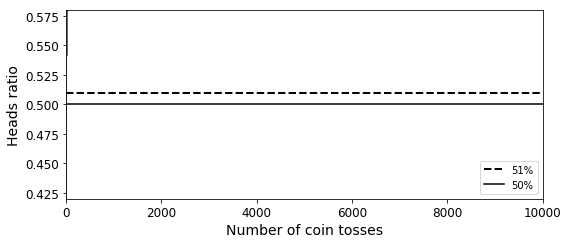

In [4]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
save_fig("law_of_large_numbers_plot")
plt.show()

suppose	you	build	an	ensemble	containing	1,000	classifiers	that	are	individually	correct	only 51%	of	the	time	(barely	better	than	random	guessing).	If	you	predict	the	majority	voted	class,	you	can hope	for	up	to	75%	accuracy!	However,	this	is	only	true	if	all	classifiers	are	perfectly	independent, making	uncorrelated	errors,	which	is	clearly	not	the	case	since	they	are	trained	on	the	same	data.	They	are likely	to	make	the	same	types	of	errors,	so	there	will	be	many	majority	votes	for	the	wrong	class,	reducing the	ensemble’s	accuracy

SOLUTION:Ensemble	methods	work	best	when	the	predictors	are	as	independent	from	one	another	as	possible.	One	way	to	get	diverse classifiers	is	to	train	them	using	very	different	algorithms.	This	increases	the	chance	that	they	will	make	very	different	types	of errors,	improving	the	ensemble’s	accuracy.


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=500, noise=0.30, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [7]:
lg_clf=LogisticRegression(solver='liblinear')
rnd_clf=RandomForestClassifier(n_estimators=10)
svm_clf=SVC(gamma='auto')

In [8]:
voting_clf=VotingClassifier(estimators=[('lr',lg_clf),('rnd',rnd_clf),('svc',svm_clf)],voting='hard')

In [9]:
voting_clf.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)), ('rnd', Ra...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [10]:
from sklearn.metrics import accuracy_score

In [11]:
for clf in (lg_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_pred,y_test))

LogisticRegression 0.864
RandomForestClassifier 0.88
SVC 0.888
VotingClassifier 0.888


The	voting	classifier	slightly	outperforms	all	the	individual	classifiers

SOFT VOTING:If	all	classifiers	are	able	to	estimate	class	probabilities	(i.e.,	they	have	a	predict_proba()	method), then	you	can	tell	Scikit-Learn	to	predict	the	class	with	the	highest	class	probability,	averaged	over	all	the individual	classifiers.	This	is	called	soft	voting

In [12]:
lg_clf=LogisticRegression(solver='liblinear')
rnd_clf=RandomForestClassifier(n_estimators=10)
svm_clf=SVC(probability=True,gamma='auto')
voting_clf=VotingClassifier(estimators=[('lr',lg_clf),('rnd',rnd_clf),('svc',svm_clf)],voting='soft')

In [13]:
for clf in (lg_clf,rnd_clf,svm_clf,voting_clf):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_pred,y_test))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.888
VotingClassifier 0.92


# Bagging	and	Pasting 

1.One	way	to	get	a	diverse	set	of	classifiers	is	to	use	very	different	training	algorithms,	as	just	discussed.

2.Another	approach	is	to	use	the	same	training	algorithm	for	every	predictor,	but	to	train	them	on	different random	subsets	of	the	training	set

3.BAGGING:	When	sampling	is	performed	with	replacement,	this	method	is	called bagging	(short	for	bootstrap	aggregating)

4.PASTING:When sampling is performed without replacement, this method is called pasting

# Bagging	and	Pasting	in	Scikit-Learn

Scikit-Learn	offers	a	simple	API	for	both	bagging	and	pasting	with	the	BaggingClassifier	class	(or BaggingRegressor	for	regression).	The	following	code	trains	an	ensemble	of	500	Decision	Tree classifiers,5	each	trained	on	100	training	instances	randomly	sampled	from	the	training	set	with replacement	(this	is	an	example	of	bagging,	but	if	you	want	to	use	pasting	instead,	just	set bootstrap=False).	The	n_jobs	parameter	tells	Scikit-Learn	the	number	of	CPU	cores	to	use	for	training and	predictions	(–1	tells	Scikit-Learn	to	use	all	available	cores):


In [14]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


The	BaggingClassifier	automatically	performs	soft	voting	instead	of	hard	voting	if	the	base	classifier	can	estimate	class probabilities	(i.e.,	if	it	has	a	predict_proba()	method),	which	is	the	case	with	Decision	Trees	classifiers.


In [16]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)
y_pred_tree = tree_clf.predict(x_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, x, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    x_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(x_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Saving figure decision_tree_without_and_with_bagging_plot


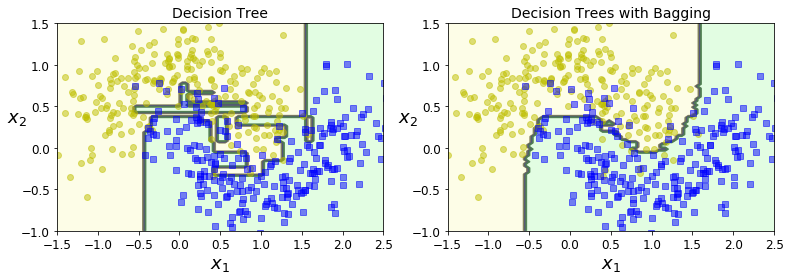

In [18]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, x, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, x, y)
plt.title("Decision Trees with Bagging", fontsize=14)
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

1.compares	the	decision	boundary	of	a	single	Decision	Tree	with	the	decision	boundary	of	a bagging	ensemble	of	500	trees	(from	the	preceding	code),	both	trained	on	the	moons	dataset.	As	you	can see,	the	ensemble’s	predictions	will	likely	generalize	much	better	than	the	single	Decision	Tree’s predictions:	the	ensemble	has	a	comparable	bias	but	a	smaller	variance	(it	makes	roughly	the	same number	of	errors	on	the	training	set,	but	the	decision	boundary	is	less	irregular).


2.Bootstrapping	introduces	a	bit	more	diversity	in	the	subsets	that	each	predictor	is	trained	on,	so	bagging
ends	up	with	a	slightly	higher	bias	than	pasting,	but	this	also	means	that	predictors	end	up	being	less correlated	so	the	ensemble’s	variance	is	reduced.	Overall,	bagging	often	results	in	better	models,	which explains	why	it	is	generally	preferred.	However,	if	you	have	spare	time	and	CPU	power	you	can	use cross-validation	to	evaluate	both	bagging	and	pasting	and	select	the	one	that	works	best.

# Out-of-Bag	Evaluation

With	bagging,	some	instances	may	be	sampled	several	times	for	any	given	predictor,	while	others	may	not be	sampled	at	all.	By	default	a	BaggingClassifier	samples	m	training	instances	with	replacement (bootstrap=True),	where	m	is	the	size	of	the	training	set.	This	means	that	only	about	63%	of	the	training instances	are	sampled	on	average	for	each	predictor.6	The	remaining	37%	of	the	training	instances	that	are not	sampled	are	called	out-of-bag	(oob)	instances.	

Since	a	predictor	never	sees	the	oob	instances	during	training,	it	can	be	evaluated	on	these	instances, without	the	need	for	a	separate	validation	set	or	cross-validation.	You	can	evaluate	the	ensemble	itself	by averaging	out	the	oob	evaluations	of	each	predictor. 

3.In	Scikit-Learn,	you	can	set	oob_score=True	when	creating	a	BaggingClassifier	to	request	an automatic	oob	evaluation	after	training.	The	following	code	demonstrates	this.	The	resulting	evaluation score	is	available	through	the	oob_score_	variable:


In [19]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
     bootstrap=True, n_jobs=-1,oob_score=True)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

In [20]:
bag_clf.oob_score_

0.8986666666666666

In [21]:
accuracy_score(y_test,y_pred)

0.912

The	oob	decision	function	for	each	training	instance	is	also	available	through	the oob_decision_function_	variable.	In	this	case	(since	the	base	estimator	has	a	predict_proba() method)	the	decision	function	returns	the	class	probabilities	for	each	training	instance.	For	example,	the oob	evaluation	estimates	that	the	second	training	instance	has	a	60.6%	probability	of	belonging	to	the positive	class

In [22]:
bag_clf.oob_decision_function_

array([[0.40571429, 0.59428571],
       [0.41860465, 0.58139535],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.07428571, 0.92571429],
       [0.33516484, 0.66483516],
       [0.01604278, 0.98395722],
       [0.98333333, 0.01666667],
       [0.98203593, 0.01796407],
       [0.82258065, 0.17741935],
       [0.        , 1.        ],
       [0.73604061, 0.26395939],
       [0.90909091, 0.09090909],
       [0.96410256, 0.03589744],
       [0.02645503, 0.97354497],
       [0.        , 1.        ],
       [0.98843931, 0.01156069],
       [0.9281768 , 0.0718232 ],
       [0.99382716, 0.00617284],
       [0.02272727, 0.97727273],
       [0.32386364, 0.67613636],
       [0.93229167, 0.06770833],
       [1.        , 0.        ],
       [0.96216216, 0.03783784],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.5819209 , 0.4180791 ],
       [0.

# Random	Patches	and	Random	Subspaces 

The	BaggingClassifier	class	supports	sampling	the	features	as	well.	This	is	controlled	by	two hyperparameters:	max_features	and	bootstrap_features.	They	work	the	same	way	as	max_samples and	bootstrap,	but	for	feature	sampling	instead	of	instance	sampling.	Thus,	each	predictor	will	be trained	on	a	random	subset	of	the	input	features

RANDOM PATCHES:This	is	particularly	useful	when	you	are	dealing	with	high-dimensional	inputs	(such	as	images).	Sampling both	training	instances	and	features	is	called	the	Random	Patches	method.

RANDOM SPACES:	Keeping	all	training	instances (i.e.,	bootstrap=False	and	max_samples=1.0)	but	sampling	features	(i.e.,	bootstrap_features=True and/or	max_features	smaller	than	1.0)	is	called	the	Random	Subspaces	method.8

***Sampling	features	results	in	even	more	predictor	diversity,	trading	a	bit	more	bias	for	a	lower	variance.

# Random	Forests

As	we	have	discussed,	a	Random	Forest9	is	an	ensemble	of	Decision	Trees,	generally	trained	via	the bagging	method	(or	sometimes	pasting),	typically	with	max_samples	set	to	the	size	of	the	training	set. Instead	of	building	a	BaggingClassifier	and	passing	it	a	DecisionTreeClassifier,	you	can	instead use	the	RandomForestClassifier	class,	which	is	more	convenient	and	optimized	for	Decision	Trees10 (similarly,	there	is	a	RandomForestRegressor	class	for	regression	tasks).

In [23]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16)

In [24]:
rnd_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=16,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
y_pred_rf=rnd_clf.predict(x_test)

In [26]:
accuracy_score(y_pred_rf,y_test)

0.92

The	Random	Forest	algorithm	introduces	extra	randomness	when	growing	trees;	instead	of	searching	for the	very	best	feature	when	splitting	a	node	(see	Chapter	6),	it	searches	for	the	best	feature	among	a random	subset	of	features.	This	results	in	a	greater	tree	diversity,	which	(once	again)	trades	a	higher	bias for	a	lower	variance,	generally	yielding	an	overall	better	model

In [27]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier( splitter="random",max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

In [28]:
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

In [29]:
accuracy_score(y_pred,y_test)

0.92

# Extra-Trees 

When	you	are	growing	a	tree	in	a	Random	Forest,	at	each	node	only	a	random	subset	of	the	features	is considered	for	splitting	(as	discussed	earlier).	It	is	possible	to	make	trees	even	more	random	by	also using	random	thresholds	for	each	feature	rather	than	searching	for	the	best	possible	thresholds	(like regular	Decision	Trees	do). 

A	forest	of	such	extremely	random	trees	is	simply	called	an	Extremely	Randomized	Trees	ensemble12	(or Extra-Trees	for	short).	Once	again,	this	trades	more	bias	for	a	lower	variance.	It	also	makes	Extra-Trees much	faster	to	train	than	regular	Random	Forests	since	finding	the	best	possible	threshold	for	each	feature at	every	node	is	one	of	the	most	time-consuming	tasks	of	growing	a	tree. 

You	can	create	an	Extra-Trees	classifier	using	Scikit-Learn’s	ExtraTreesClassifier	class.	Its	API	is identical	to	the	RandomForestClassifier	class.	Similarly,	the	ExtraTreesRegressor	class	has	the same	API	as	the	RandomForestRegressor	class

NOTE:It	is	hard	to	tell	in	advance	whether	a	RandomForestClassifier	will	perform	better	or	worse	than	an	ExtraTreesClassifier. Generally,	the	only	way	to	know	is	to	try	both	and	compare	them	using	cross-validation	(and	tuning	the	hyperparameters	using grid	search).

# Feature	Importance 

Lastly,	if	you	look	at	a	single	Decision	Tree,	important	features	are	likely	to	appear	closer	to	the	root	of the	tree,	while	unimportant	features	will	often	appear	closer	to	the	leaves	(or	not	at	all).	It	is	therefore possible	to	get	an	estimate	of	a	feature’s	importance	by	computing	the	average	depth	at	which	it	appears across	all	trees	in	the	forest.	Scikit-Learn	computes	this	automatically	for	every	feature	after	training.	You can	access	the	result	using	the	feature_importances_	variable.	For	example,	the	following	code	trains a	RandomForestClassifier	on	the	iris	dataset	(introduced	in	Chapter	4)	and	outputs	each	feature’s importance.	It	seems	that	the	most	important	features	are	the	petal	length	(44%)	and	width	(42%),	while sepal	length	and	width	are	rather	unimportant	in	comparison	(11%	and	2%,	respectively

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)


sepal length (cm) 0.11249225099876374
sepal width (cm) 0.023119288282510326
petal length (cm) 0.44103046436395765
petal width (cm) 0.4233579963547681


In [31]:
rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

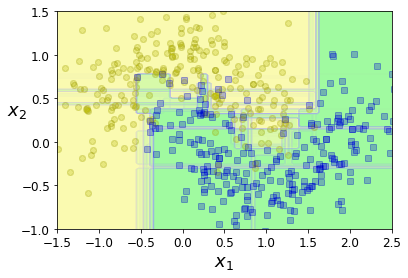

In [32]:
plt.figure(figsize=(6, 4))

for i in range(15):
    tree_clf = DecisionTreeClassifier(max_leaf_nodes=16, random_state=42 + i)
    indices_with_replacement = np.random.randint(0, len(x_train), len(x_train))
    tree_clf.fit(x[indices_with_replacement], y[indices_with_replacement])
    plot_decision_boundary(tree_clf, x, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.02, contour=False)

plt.show()

# train	a	Random	Forest	classifier	on	the	MNIST	dataset	and plot	each	pixel’s	importance

In [33]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [34]:
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [35]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

Saving figure mnist_feature_importance_plot


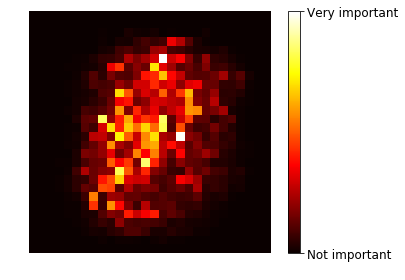

In [36]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

save_fig("mnist_feature_importance_plot")
plt.show()

Random	Forests	are	very	handy	to	get	a	quick	understanding	of	what	features	actually	matter,	in	particular if	you	need	to	perform	feature	selection.

# Boosting

Boosting	(originally	called	hypothesis	boosting)	refers	to	any	Ensemble	method	that	can	combine	several weak	learners	into	a	strong	learner.	The	general	idea	of	most	boosting	methods	is	to	train	predictors sequentially,	each	trying	to	correct	its	predecessor.	There	are	many	boosting	methods	available,	but	by	far the	most	popular	are	AdaBoost13	(short	for	Adaptive	Boosting)	and	Gradient	Boosting.	Let’s	start	with AdaBoost.

# AdaBoost 

One	way	for	a	new	predictor	to	correct	its	predecessor	is	to	pay	a	bit	more	attention	to	the	training instances	that	the	predecessor	underfitted.	This	results	in	new	predictors	focusing	more	and	more	on	the hard	cases.	This	is	the	technique	used	by	"AdaBoost"

For	example,	to	build	an	AdaBoost	classifier,	a	first	base	classifier	(such	as	a	Decision	Tree)	is	trained and	used	to	make	predictions	on	the	training	set.	The	relative	weight	of	misclassified	training	instances	is then	increased.	A	second	classifier	is	trained	using	the	updated	weights	and	again	it	makes	predictions	on the	training	set,	weights	are	updated,	and	so	on

In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=100,algorithm='SAMME.R',learning_rate=0.5)

In [38]:
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=100, random_state=None)

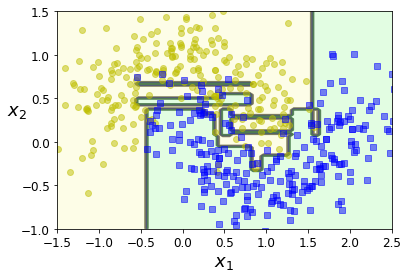

In [39]:
plot_decision_boundary(ada_clf,x,y)

Saving figure boosting_plot


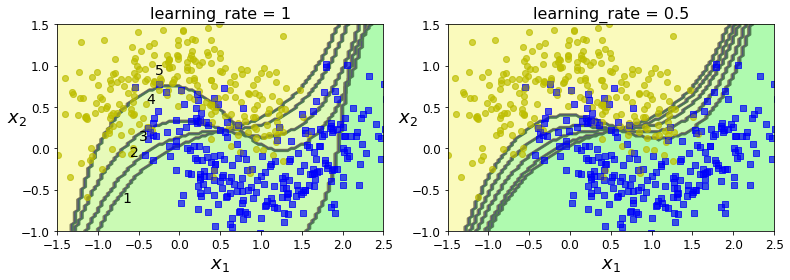

In [40]:
m = len(x_train)

plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="auto", random_state=42)
        svm_clf.fit(x_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(x_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, x, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 121:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)

save_fig("boosting_plot")
plt.show()


There	is	one	important	drawback	to	this	sequential	learning	technique:	it	cannot	be	parallelized	(or	only	partially),	since	each predictor	can	only	be	trained	after	the	previous	predictor	has	been	trained	and	evaluated.	As	a	result,	it	does	not	scale	as	well	as bagging	or	pasting.


If	your	AdaBoost	ensemble	is	overfitting	the	training	set,	you	can	try	reducing	the	number	of	estimators	or	more	strongly regularizing	the	base	estimator.

# Gradient	Boosting 

Another	very	popular	Boosting	algorithm	is	Gradient	Boosting.17	Just	like	AdaBoost,	Gradient	Boosting works	by	sequentially	adding	predictors	to	an	ensemble,	each	one	correcting	its	predecessor.	However, instead	of	tweaking	the	instance	weights	at	every	iteration	like	AdaBoost	does,	this	method	tries	to	fit	the new	predictor	to	the	residual	errors	made	by	the	previous	predictor.

Let’s	go	through	a	simple	regression	example	using	Decision	Trees	as	the	base	predictors	(of	course Gradient	Boosting	also	works	great	with	regression	tasks).	This	is	called	Gradient	Tree	Boosting,	or Gradient	Boosted	Regression	Trees	(GBRT).


In [56]:
np.random.seed(42)
x = np.random.rand(100, 1) - 0.5
y = 3*x[:, 0]**2 + 0.05 * np.random.randn(100)

In [57]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1=DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [58]:
y2= y-tree_reg1.predict(x)

In [59]:
tree_reg2=DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(x,y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [60]:
y3=y2-tree_reg2.predict(x)

In [61]:
tree_reg3=DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(x,y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [62]:
x_new = np.array([[0.8]])
#ensemble of these predictor
y_pred=sum(tree.predict(x_new) for tree in (tree_reg1,tree_reg2,tree_reg3))

In [63]:
y_pred

array([0.75026781])

Saving figure gradient_boosting_plot


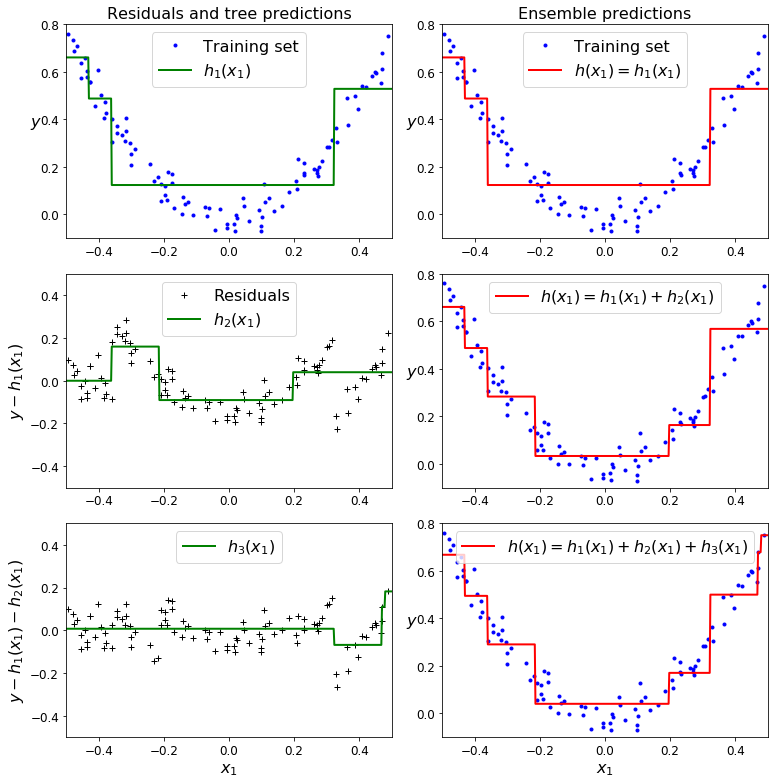

In [64]:
def plot_predictions(regressors, x, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(x[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], x, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], x, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], x, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], x, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], x, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], x, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

save_fig("gradient_boosting_plot")
plt.show()

represents	the	predictions	of	these	three	trees	in	the	left	column,	and	the	ensemble’s predictions	in	the	right	column.	In	the	first	row,	the	ensemble	has	just	one	tree,	so	its	predictions	are exactly	the	same	as	the	first	tree’s	predictions.	In	the	second	row,	a	new	tree	is	trained	on	the	residual errors	of	the	first	tree.	On	the	right	you	can	see	that	the	ensemble’s	predictions	are	equal	to	the	sum	of	the predictions	of	the	first	two	trees.	Similarly,	in	the	third	row	another	tree	is	trained	on	the	residual	errors of	the	second	tree.	You	can	see	that	the	ensemble’s	predictions	gradually	get	better	as	trees	are	added	to the	ensemble.

A	simpler	way	to	train	GBRT	ensembles	is	to	use	Scikit-Learn’s	GradientBoostingRegressor	class. Much	like	the	RandomForestRegressor	class,	it	has	hyperparameters	to	control	the	growth	of	Decision Trees	(e.g.,	max_depth,	min_samples_leaf,	and	so	on),	as	well	as	hyperparameters	to	control	the ensemble	training,	such	as	the	number	of	trees	(n_estimators).	The	following	code	creates	the	same ensemble	as	the	previous	one:

In [89]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt=GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=0.1)

In [90]:
gbrt.fit(x,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [91]:
gbrt.predict(x_new)

array([0.33682158])

1.The	learning_rate	hyperparameter	scales	the	contribution	of	each	tree

2.	If	you	set	it	to	a	low	value,	such as	0.1,	you	will	need	more	trees	in	the	ensemble	to	fit	the	training	set,	but	the	predictions	will	usually generalize	better.	This	is	a	regularization	technique	called	shrinkage

In [92]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt_slow=GradientBoostingRegressor(max_depth=2,n_estimators=200,learning_rate=0.1)

In [93]:
gbrt_slow.fit(x,y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [94]:
gbrt_slow.predict(x_new)

array([0.74398943])

Saving figure gbrt_learning_rate_plot


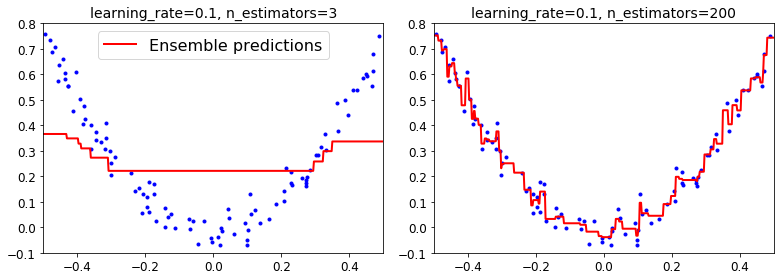

In [95]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], x, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], x, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)

save_fig("gbrt_learning_rate_plot")
plt.show()

two	GBRT ensembles	trained	with	a	low	learning	rate:	the	one	on	the	left	does	not	have	enough	trees	to	fit	the training	set,	while	the	one	on	the	right	has	too	many	trees	and	overfits	the	training	set.

sol:In	order	to	find	the	optimal	number	of	trees,	you	can	use	early	stopping

process:A	simple	way	to implement	this	is	to	use	the	staged_predict()	method:	it	returns	an	iterator	over	the	predictions	made by	the	ensemble	at	each	stage	of	training	(with	one	tree,	two	trees,	etc.).

The	following	code	trains	a GBRT	ensemble	with	120	trees,	then	measures	the	validation	error	at	each	stage	of	training	to	find	the optimal	number	of	trees,	and	finally	trains	another	GBRT	ensemble	using	the	optimal	number	of	trees

In [96]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(x_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(x_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=56, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [97]:
min_error = np.min(errors)

Saving figure early_stopping_gbrt_plot


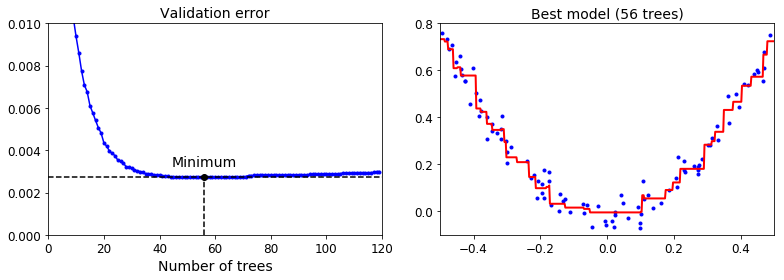

In [104]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], x, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)

save_fig("early_stopping_gbrt_plot")
plt.show()

In [106]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(x_train, y_train)
    y_pred = gbrt.predict(x_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [107]:
print(gbrt.n_estimators)


61


In [108]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.002712853325235463


The	GradientBoostingRegressor	class	also	supports	a	subsample	hyperparameter,	which	specifies the	fraction	of	training	instances	to	be	used	for	training	each	tree.	For	example,	if	subsample=0.25,	then each	tree	is	trained	on	25%	of	the	training	instances,	selected	randomly.	As	you	can	probably	guess	by now,	this	trades	a	higher	bias	for	a	lower	variance.	It	also	speeds	up	training	considerably.	This	technique is	called	"Stochastic	Gradient	Boosting."


It	is	possible	to	use	Gradient	Boosting	with	other	cost	functions.	This	is	controlled	by	the	loss	hyperparameter	

# Stacking

# Exercise solutions

1.If	you	have	trained	five	different	models	on	the	exact	same	training	data,	and	they	all	achieve 95%	precision,	is	there	any	chance	that	you	can	combine	these	models	to	get	better	results?	If	so, how?	If	not,	why? 

answer:	If	you	have	trained	five	different	models	and	they	all	achieve	95%	precision,	you	can	try combining	them	into	a	voting	ensemble,	which	will	often	give	you	even	better	results.	It	works better	if	the	models	are	very	different	(e.g.,	an	SVM	classifier,	a	Decision	Tree	classifier,	a Logistic	Regression	classifier,	and	so	on).	It	is	even	better	if	they	are	trained	on	different	training instances	(that’s	the	whole	point	of	bagging	and	pasting	ensembles),	but	if	not	it	will	still	work	as long	as	the	models	are	very	different. 

2.What	is	the	difference	between	hard	and	soft	voting	classifiers? 

A	node’s	Gini	impurity	is	generally	lower	than	its	parent’s.	This	is	ensured	by	the	CART	training algorithm’s	cost	function,	which	splits	each	node	in	a	way	that	minimizes	the	weighted	sum	of	its children’s	Gini	impurities.	However,	if	one	child	is	smaller	than	the	other,	it	is	possible	for	it	to have	a	higher	Gini	impurity	than	its	parent,	as	long	as	this	increase	is	more	than	compensated	for by	a	decrease	of	the	other	child’s	impurity.	For	example,	consider	a	node	containing	four instances	of	class	A	and	1	of	class	B.	Its	Gini	impurity	is		=	0.32.	Now	suppose	the dataset	is	one-dimensional	and	the	instances	are	lined	up	in	the	following	order:	A,	B,	A,	A,	A. You	can	verify	that	the	algorithm	will	split	this	node	after	the	second	instance,	producing	one child	node	with	instances	A,	B,	and	the	other	child	node	with	instances	A,	A,	A.	The	first	child node’s	Gini	impurity	is		=	0.5,	which	is	higher	than	its	parent.	This	is	compensated for	by	the	fact	that	the	other	node	is	pure,	so	the	overall	weighted	Gini	impurity	is		0.5	+		=	0.2	,	which	is	lower	than	the	parent’s	Gini	impurity.

3.Is	it	possible	to	speed	up	training	of	a	bagging	ensemble	by	distributing	it	across	multiple servers?	What	about	pasting	ensembles,	boosting	ensembles,	random	forests,	or	stacking ensembles? 

If	a	Decision	Tree	is	overfitting	the	training	set,	it	may	be	a	good	idea	to	decrease	max_depth, since	this	will	constrain	the	model,	regularizing	it. 